# Write a Data Science Blog Post - Stack Overflow Survey Discovery

As a developer, you may feel some trends are happening based on your intuition or experience. But, is it a real trend or just an illusion? To answer this question, we need data to tell its story.

Since 2011, Stack Overflow conducted [developer survey](https://insights.stackoverflow.com/survey) examining all aspects of the developer experiences around the world. It covers career satisfaction, education and opinions on open source software, etc.
Here, I list three questions I'm interested in. In this article, I'll share my findings below. Here are my questions :

## Questions
1. What are the top 5 popular languages from 2018 to 2019 ?
2. What is the most popular version control tool in 2018 ? What percentage does it take ?
3. What is the most popular IDE from 2017 to 2019 ?

You may guess the results before reading. Let's go !

## Import neccessary modules

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
%matplotlib inline

pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def get_description(column_name, schema):
    '''
    INPUT - schema - pandas dataframe with the schema of the developers survey
            column_name - string - the name of the column you would like to know about
    OUTPUT - 
            desc - string - the description of the column
    '''
    if 'Question' in schema:
        desc = list(schema[schema['Column'] == column_name]['Question'])[0]
    elif 'QuestionText' in schema:
        desc = list(schema[schema['Column'] == column_name]['QuestionText'])[0]
    return desc

#get_description(df.columns[0])

In [3]:
def item_count(df, col, delimiter='; '):
    '''
    INPUT:
    df - the pandas dataframe you want to search
    col - the column name you want to look through

    OUTPUT:
    new_df - a dataframe with the count of unique item it shows up
    '''
    new_df = defaultdict(int)
    df_rm = df.dropna(subset=[col], how='any') 
    df_rm = df_rm.reset_index(drop=True)
    for idx in range(df_rm.shape[0]):
        item_list = df_rm[col][idx].split(delimiter)
        for item in item_list:
            new_df[item] += 1
    new_df = pd.DataFrame(pd.Series(new_df)).reset_index()
    new_df.columns = [col, 'Count']
    return new_df

def add_perc(df, count_col='Count', perc_col = 'Percentage'):
    '''
    Add percentage column based on a specific count column
    INPUT:
    df - the pandas dataframe containing count column
    count_col - the count column name you want to use for calculating percentage
    perc_col - the percentage column name you want to add

    OUTPUT:
    df - a dataframe with additional percentage column 
    '''    
    df[perc_col] = df[count_col]/df[count_col].sum() 
    return df

## Q1 : What are the top 5 popular languages from 2018 to 2019 ?

### 1. Business Understanding
What are the top 5 popular languages from 2018 to 2019 ?

### 2. Data Understanding

First, read in data and schema.

In [4]:
schema_18 = pd.read_csv('./developer_survey_2018/survey_results_schema.csv');
schema_19 = pd.read_csv('./developer_survey_2019/survey_results_schema.csv');
df_18 = pd.read_csv('./developer_survey_2018/survey_results_public.csv');
df_19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv');

/Users/RAYMOND/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Briefly check the data to see if there're columns related to our question.

In [5]:
df_18.head(3)
print("2018 survey data shape = ", df_18.shape)
df_19.head(3)
print("2019 survey data shape = ", df_19.shape)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

2018 survey data shape =  (98855, 129)


,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

2019 survey data shape =  (88883, 85)


There're several columns may be related to our question. To ensure it, I checked those columns by finding out what it means using get_description function.

In [6]:
get_description('LanguageWorkedWith', schema_18)
get_description('LanguageWorkedWith', schema_19)

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

'Which of the following programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year?  (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

### 3. Data Preparation
Since there may be several languages selceted in each data cell, I used item_count function to seperate and count items for each data cell. Then sort value based on **Count** column and show the top 10 results.

In [7]:
lang_18 = item_count(df_18,'LanguageWorkedWith', delimiter=';')
lang_18.sort_values('Count', ascending=False, inplace=True)

lang_19 = item_count(df_19,'LanguageWorkedWith', delimiter=';')
lang_19.sort_values('Count', ascending=False, inplace=True)

lang_18.reset_index(drop=True, inplace=True)
lang_19.reset_index(drop=True, inplace=True)
lang_18.head(10)
lang_19.head(10)

,LanguageWorkedWith,Count
0,JavaScript,54686
1,HTML,53628
2,CSS,50979
3,SQL,44670
4,Java,35521
5,Bash/Shell,31172
6,Python,30359
7,C#,26954
8,PHP,24071
9,C++,19872


,LanguageWorkedWith,Count
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917
5,Bash/Shell/PowerShell,31991
6,C#,27097
7,PHP,23030
8,C++,20524
9,TypeScript,18523


We can see **HTML** and **CSS** are seperatedly counted in 2018 but counted together in 2019. Because the amount of counts for **HTML** and **CSS** in 2018 are similar, I took **HTML** as representative and renamed it as **HTML/CSS**.
On the other hand, **Bash/Shell** in 2018 is the same category as **Bash/Shell/PowerShell** in 2019. For consistency, I renamed them as **Shell**.

In [8]:
lang_18.iloc[1, 0] = 'HTML/CSS';
lang_18.iloc[5,0] = 'Shell';
lang_18.drop(lang_18.index[2], inplace=True);
lang_18.reset_index(drop=True, inplace=True);
lang_18.head(10)

lang_19.iloc[5,0] = 'Shell';
lang_19.head(10)

,LanguageWorkedWith,Count
0,JavaScript,54686
1,HTML/CSS,53628
2,SQL,44670
3,Java,35521
4,Shell,31172
5,Python,30359
6,C#,26954
7,PHP,24071
8,C++,19872
9,C,18042


,LanguageWorkedWith,Count
0,JavaScript,59219
1,HTML/CSS,55466
2,SQL,47544
3,Python,36443
4,Java,35917
5,Shell,31991
6,C#,27097
7,PHP,23030
8,C++,20524
9,TypeScript,18523


Afterwards, I set index using **LanguageWorkedWith** column and plot bar chart.

In [9]:
lang_18.set_index('LanguageWorkedWith', inplace=True);
lang_19.set_index('LanguageWorkedWith', inplace=True);

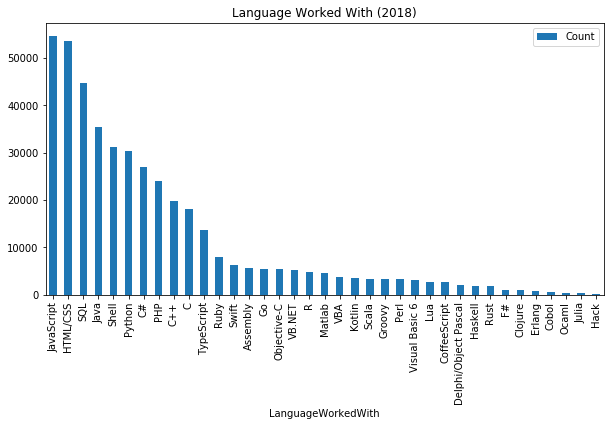

In [10]:
lang_18.head(10)
lang_18.plot.bar(figsize=(10,5), fontsize=10)
plt.title('Language Worked With (2018)');

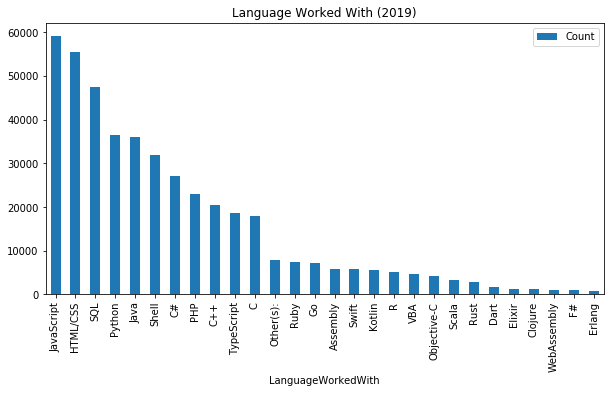

In [11]:
lang_19.head(10)
lang_19.plot.bar(figsize=(10,5), fontsize=10)
plt.title('Language Worked With (2019)');

### 4. Analysis
It's clear in the bar charts that the top 5 popular languages in 2018 are :
1. **JavaScript**
2. **HTML/CSS**
3. **SQL**
4. **Java**
5. **Shell**

And the top 5 popular languages in 2019 are : 
1. **JavaScript**
2. **HTML/CSS**
3. **SQL**
4. **Python**
5. **Java**

The top 3 popular languages remain the same. Also, it can be noted that **Python** replace **Shell** in the top 5 list in 2019.

To conduct a more detailed analysis, I merge data, add percentage columns and calculate percentage difference for data in 2018 and 2019.

In [12]:
lang_18.rename(columns={"Count": "Count_2018"}, inplace=True)
lang_19.rename(columns={"Count": "Count_2019"}, inplace=True)

lang = pd.merge(lang_18, lang_19, on='LanguageWorkedWith')

In [13]:
lang["Count_Sum"] = lang["Count_2018"] + lang["Count_2019"]

lang=add_perc(lang, count_col='Count_2018', perc_col = 'Percentage_2018')
lang=add_perc(lang, count_col='Count_2019', perc_col = 'Percentage_2019')
lang["Percentage_Difference"] = lang["Percentage_2019"] - lang["Percentage_2018"]

lang.sort_values('Count_Sum', ascending=False, inplace=True)
lang.head(10)

,Count_2018,Count_2019,Count_Sum,Percentage_2018,Percentage_2019,Percentage_Difference
LanguageWorkedWith,,,,,,
JavaScript,54686,59219,113905,0.135340,0.138160,0.002820
HTML/CSS,53628,55466,109094,0.132721,0.129404,-0.003317
SQL,44670,47544,92214,0.110552,0.110922,0.000370
Java,35521,35917,71438,0.087909,0.083795,-0.004114
Python,30359,36443,66802,0.075134,0.085023,0.009889
Shell,31172,31991,63163,0.077146,0.074636,-0.002510
C#,26954,27097,54051,0.066707,0.063218,-0.003489
PHP,24071,23030,47101,0.059572,0.053730,-0.005842
C++,19872,20524,40396,0.049180,0.047883,-0.001297


Then, I plotted bar chart for percentage difference between 2018 and 2019.

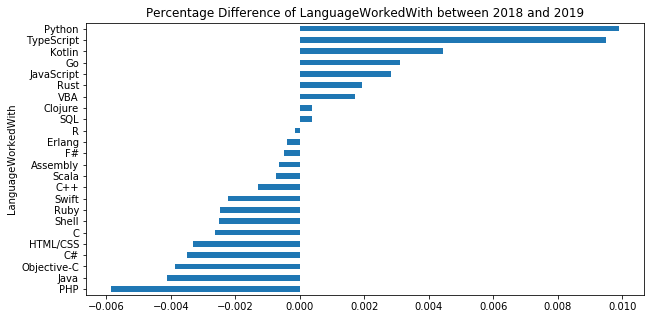

In [14]:
lang["Percentage_Difference"].sort_values().plot.barh(figsize=(10,5), fontsize=10);
plt.title("Percentage Difference of LanguageWorkedWith between 2018 and 2019");

If we take 0.5% as threshold, we can see **Python** and **TypeScript** are most promising languages in 2019. On the other hand, **PHP** tends to be unpopular in 2019.

## Q2 :  What is the most popular version control tool in 2018 ? What percentage does it take ?

### 1. Business Understanding
What is the most popular version control tool in 2018 ? What percentage does it take ?

### 2. Data Understanding

Firstly, read in and checked data column to see if there're columns related to the question.

In [15]:
schema_18 = pd.read_csv('./developer_survey_2018/survey_results_schema.csv');
schema_19 = pd.read_csv('./developer_survey_2019/survey_results_schema.csv');
df_18 = pd.read_csv('./developer_survey_2018/survey_results_public.csv');
df_19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv');

/Users/RAYMOND/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
df_18.head(3)
df_19.head(3)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

The only column might be related is "VersionControl" column in 2018 data. There is no related column in 2019 data.
To ensure the meaning of the column, I checked it using get_description function.

In [17]:
get_description("VersionControl", schema_18)

'What version control systems do you use regularly? Please select all that apply.'

### 3. Data preparation


Since there may be several version control tools selceted in each data cell, I used item_count function to seperate and count items for each data cell. Then sort value according to 'Count' column.

In [18]:
vc = item_count(df_18, 'VersionControl', delimiter=';')
vc.sort_values('Count', ascending=False, inplace=True)
vc.rename(columns={"Count": "Count_2018"}, inplace=True)

Then, I added percentage column for it.

In [19]:
vc = add_perc(vc, count_col='Count_2018', perc_col = 'Percentage_2018')
vc.sort_values('Count_2018', ascending=False, inplace=True)
vc = vc.set_index('VersionControl')
vc

,Count_2018,Percentage_2018
VersionControl,,
Git,64824,0.630682
Subversion,11936,0.116127
Team Foundation Version Control,8067,0.078485
Zip file back-ups,5869,0.057100
Copying and pasting files to network shares,5846,0.056877
I don't use version control,3562,0.034655
Mercurial,2680,0.026074


And plot the pie char based on 'Percentage_2018' column.

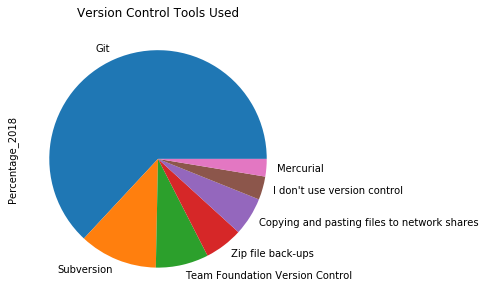

In [20]:
vc["Percentage_2018"].plot.pie(figsize=(10,5), fontsize=10);
plt.title("Version Control Tools Used");

## 4. Analysis

According to the pie chart, 'Git' is the most popular version control tool in 2018. It takes about 63% in 2018 based on the percentage statistics in the previous chart. 

## Q3 : What is the most popular IDE from 2017 to 2019 ?

### 1. Business Understanding
What is the most popular IDE from 2017 to 2019 ?

### 2. Data Understanding

Firstly, read in and checked data column to see if there're columns related to the question.

In [21]:
schema_17 = pd.read_csv('./developer_survey_2017/survey_results_schema.csv');
schema_18 = pd.read_csv('./developer_survey_2018/survey_results_schema.csv');
schema_19 = pd.read_csv('./developer_survey_2019/survey_results_schema.csv');
df_17 = pd.read_csv('./developer_survey_2017/survey_results_public.csv');
df_18 = pd.read_csv('./developer_survey_2018/survey_results_public.csv');
df_19 = pd.read_csv('./developer_survey_2019/survey_results_public.csv');

/Users/RAYMOND/miniconda3/envs/ml/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [22]:
df_17.head(3)
df_18.head(3)
df_19.head(3)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

There're several columns may be related to our question. To ensure it, I checked those columns by finding out what it means using get_description function.

In [23]:
get_description('IDE', schema_17)
get_description('IDE', schema_18)
get_description('DevEnviron', schema_19)

'Which development environment(s) do you use regularly?'

'Which development environment(s) do you use regularly?  Please check all that apply.'

'Which development environment(s) do you use regularly?  Please check all that apply.'

### 3. Data Preparation

Since there may be several IDE selceted in each data cell, I used item_count function to seperate and count items for each data cell. Then sort value according to 'Count' column.

In [24]:
ide_17 = item_count(df_17, 'IDE', delimiter='; ')
ide_17.sort_values('Count', ascending=False, inplace=True)
ide_17.rename(columns={"Count": "Count_2017"}, inplace=True)

ide_18 = item_count(df_18,'IDE', delimiter=';')
ide_18.sort_values('Count', ascending=False, inplace=True)
ide_18.rename(columns={"Count": "Count_2018"}, inplace=True)

ide_19 = item_count(df_19,'DevEnviron', delimiter=';')
ide_19.sort_values('Count', ascending=False, inplace=True)
ide_19.rename(columns={"Count": "Count_2019"}, inplace=True)
ide_19.rename(columns={"DevEnviron": "IDE"}, inplace=True)

In [25]:
ide_17.reset_index(drop=True, inplace=True)
ide_18.reset_index(drop=True, inplace=True)
ide_19.reset_index(drop=True, inplace=True)
ide_17.set_index('IDE', inplace=True)
ide_18.set_index('IDE', inplace=True)
ide_19.set_index('IDE', inplace=True)

,Count_2017
IDE,
Visual Studio,13677
Notepad++,12681
Sublime Text,9978
Vim,9679
Eclipse,7899
IntelliJ,7418
Visual Studio Code,6826
Atom,6540
Android Studio,5953


Text(0.5, 1.0, 'IDE used (2017)')

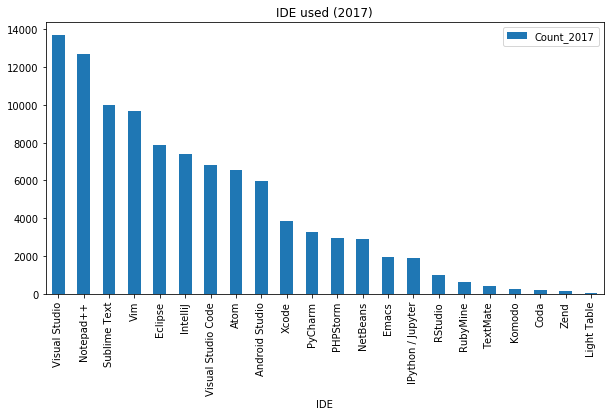

In [26]:
ide_17.head(10)
ide_17.plot.bar(figsize=(10,5), fontsize=10)
plt.title("IDE used (2017)")

,Count_2018
IDE,
Visual Studio Code,26280
Visual Studio,25870
Notepad++,25755
Sublime Text,21810
Vim,19477
IntelliJ,18765
Android Studio,14558
Eclipse,14213
Atom,13576


Text(0.5, 1.0, 'IDE used (2018)')

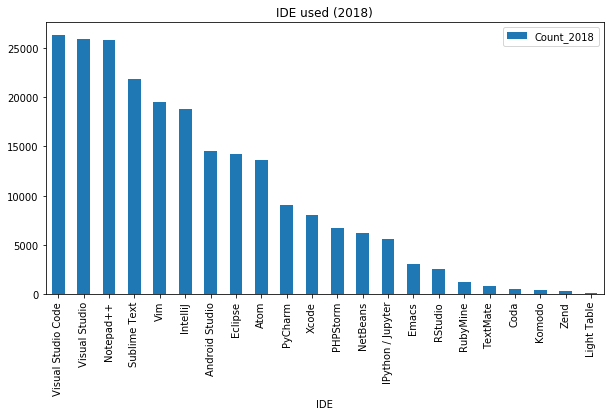

In [27]:
ide_18.head(10)
ide_18.plot.bar(figsize=(10,5), fontsize=10)
plt.title("IDE used (2018)")

,Count_2019
IDE,
Visual Studio Code,44311
Visual Studio,27490
Notepad++,26621
IntelliJ,22166
Vim,22163
Sublime Text,20424
Android Studio,14787
Eclipse,12591
PyCharm,11724


Text(0.5, 1.0, 'IDE used (2019)')

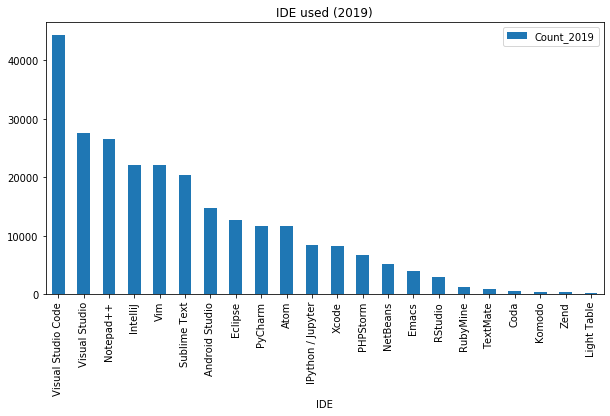

In [28]:
ide_19.head(10)
ide_19.plot.bar(figsize=(10,5), fontsize=10)
plt.title("IDE used (2019)")

## 4. Analysis

We can see clearly in the bar charts that he top 5 popular IDEs in 2017 are :
1. **Visual Studio**
2. **Notepad++**
3. **Sublime Text**
4. **Vim**
5. **Eclipse**

The top 5 popular IDEs in 2018 are :
1. **Visual Studio Code**
2. **Visual Studio**
3. **Notepad++**
4. **Sublime Text**
5. **Vim**

The top 5 popular IDEs in 2019 are :
1. **Visual Studio Code**
2. **Visual Studio**
3. **Notepad++**
4. **Intellij**
5. **Vim**

It can be noted that **Visual Studio**, **Notepad++**, **Vim** remain in the top 5 list since 2017. On the other hand, we can see **Eclipse** fell out of top 5 list since 2018 and **Sublime Text** fell out of top 5 list since 2018.

To conduct a more detailed analysis, I merge data and add percentage columns for data in 2017, 2018 and 2019.

In [29]:
ide = pd.merge(ide_17, ide_18, on='IDE')
ide = pd.merge(ide, ide_19, on='IDE')

In [30]:
ide = add_perc(ide, count_col='Count_2017', perc_col = 'Percentage_2017')
ide = add_perc(ide, count_col='Count_2018', perc_col = 'Percentage_2018')
ide = add_perc(ide, count_col='Count_2019', perc_col = 'Percentage_2019')

ide["Percentage_Difference_(2019 & 2017)"] = ide["Percentage_2019"] - ide["Percentage_2017"]
ide["Count_Sum"] = ide["Count_2017"] + ide["Count_2018"] + ide["Count_2019"]
ide.sort_values('Count_Sum', ascending=False, inplace=True)
ide.head(10)

,Count_2017,Count_2018,Count_2019,Percentage_2017,Percentage_2018,Percentage_2019,Percentage_Difference_(2019 & 2017),Count_Sum
IDE,,,,,,,,
Visual Studio Code,6826,26280,44311,0.068078,0.116914,0.175465,0.107387,77417
Visual Studio,13677,25870,27490,0.136404,0.115090,0.108856,-0.027548,67037
Notepad++,12681,25755,26621,0.126471,0.114578,0.105415,-0.021056,65057
Sublime Text,9978,21810,20424,0.099513,0.097028,0.080876,-0.018637,52212
Vim,9679,19477,22163,0.096531,0.086649,0.087762,-0.008769,51319
IntelliJ,7418,18765,22166,0.073982,0.083481,0.087774,0.013792,48349
Android Studio,5953,14558,14787,0.059371,0.064765,0.058554,-0.000817,35298
Eclipse,7899,14213,12591,0.078779,0.063230,0.049858,-0.028920,34703
Atom,6540,13576,11636,0.065225,0.060397,0.046077,-0.019148,31752


To observe the trend, I recorded all IDEs in the top 5 list since 2017 in **top5_total** list.

In [31]:
ide_perc = ide.drop(columns=["Count_2017", "Count_2018", "Count_2019", "Count_Sum", "Percentage_Difference_(2019 & 2017)"]);
top5_17=list(ide_perc["Percentage_2017"].sort_values(ascending=False)[0:5].index)
top5_18=list(ide_perc["Percentage_2018"].sort_values(ascending=False)[0:5].index)
top5_19=list(ide_perc["Percentage_2019"].sort_values(ascending=False)[0:5].index)

top5_total = top5_17
top5_total = top5_total + list(set(top5_18) - set(top5_total))
top5_total = top5_total + list(set(top5_19) - set(top5_total))

top5_total

['Visual Studio',
 'Notepad++',
 'Sublime Text',
 'Vim',
 'Eclipse',
 'Visual Studio Code',
 'IntelliJ']

In [32]:
ide_perc.head()

,Percentage_2017,Percentage_2018,Percentage_2019
IDE,,,
Visual Studio Code,0.068078,0.116914,0.175465
Visual Studio,0.136404,0.115090,0.108856
Notepad++,0.126471,0.114578,0.105415
Sublime Text,0.099513,0.097028,0.080876
Vim,0.096531,0.086649,0.087762


Then plot **Percentage** bar chart based on those IDEs in **top5_total** list.

Text(0.5, 1.0, 'IDE used (in percentage)')

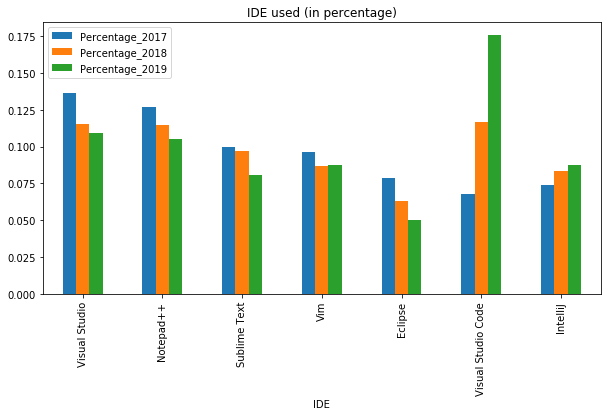

In [33]:
ide_perc.loc[top5_total, :].plot.bar(figsize=(10,5), fontsize=10)
plt.title("IDE used (in percentage)")

It's clear that **Visual Studio Code** is the most promising IDE. On the other hand, **Eclipse** and **Visual Studio** tend to be unpopular.
To analyze the trend quantitively, I plotted the bar char of percentage difference between 2017 and 2019.

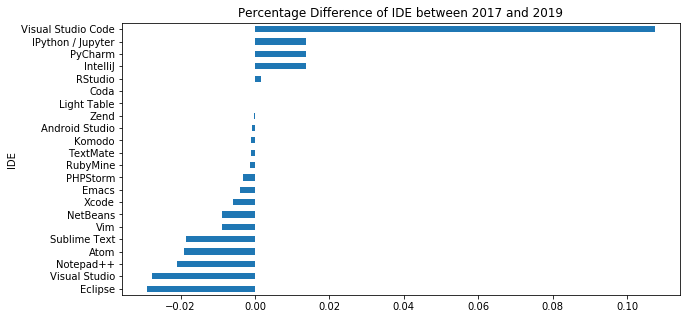

In [34]:
ide['Percentage_Difference_(2019 & 2017)'].sort_values().plot.barh(figsize=(10,5), fontsize=10)
plt.title("Percentage Difference of IDE between 2017 and 2019");

If we take 2% as threshold, we can find **Visual Studio Code** is the most promising IDE since 2017. On the other hand, **Eclipse** , **Visual Studio**, and **Notepad++** tend to be unpopular since 2017.

## Did you guess it right ? 
### Questions
1. What are the top 5 popular languages from 2018 to 2019 ?
2. What is the most popular version control tool in 2018 ? What percentage does it take ?
3. What is the most popular IDE from 2017 to 2019 ?

### Answers
1. The top 5 popular languages in 2018 are : Javascript, HTML/CSS, SQL, Java and Shell. The top 5 popular languages in 2019 are : Javascript, HTML/CSS, SQL, Python, Java
2. The most popular version control tool in 2018 is Git, and it accounts for 63%
3. The most popular IDE in 2017 is Visual Studio. The most popular IDE in 2018 and 2019 is Visual Studio Code